In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
%matplotlib inline
plt.figure(figsize=(20,20))
#libraries

<Figure size 1440x1440 with 0 Axes>

<Figure size 1440x1440 with 0 Axes>

In [237]:
#load dataset and save as db
db=pd.read_csv('datasets/Real estate.csv')
#user input dataset(the column value to be predicted must be the last column)

In [239]:
db.head()
#gives the top 5 values of all coumns (needs to be there on as output)

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [232]:
db.describe().columns #gives all the interger columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [240]:
newdb=db[db.describe().columns] 
#creates a new database with only columns having integer values

In [242]:
newdb.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


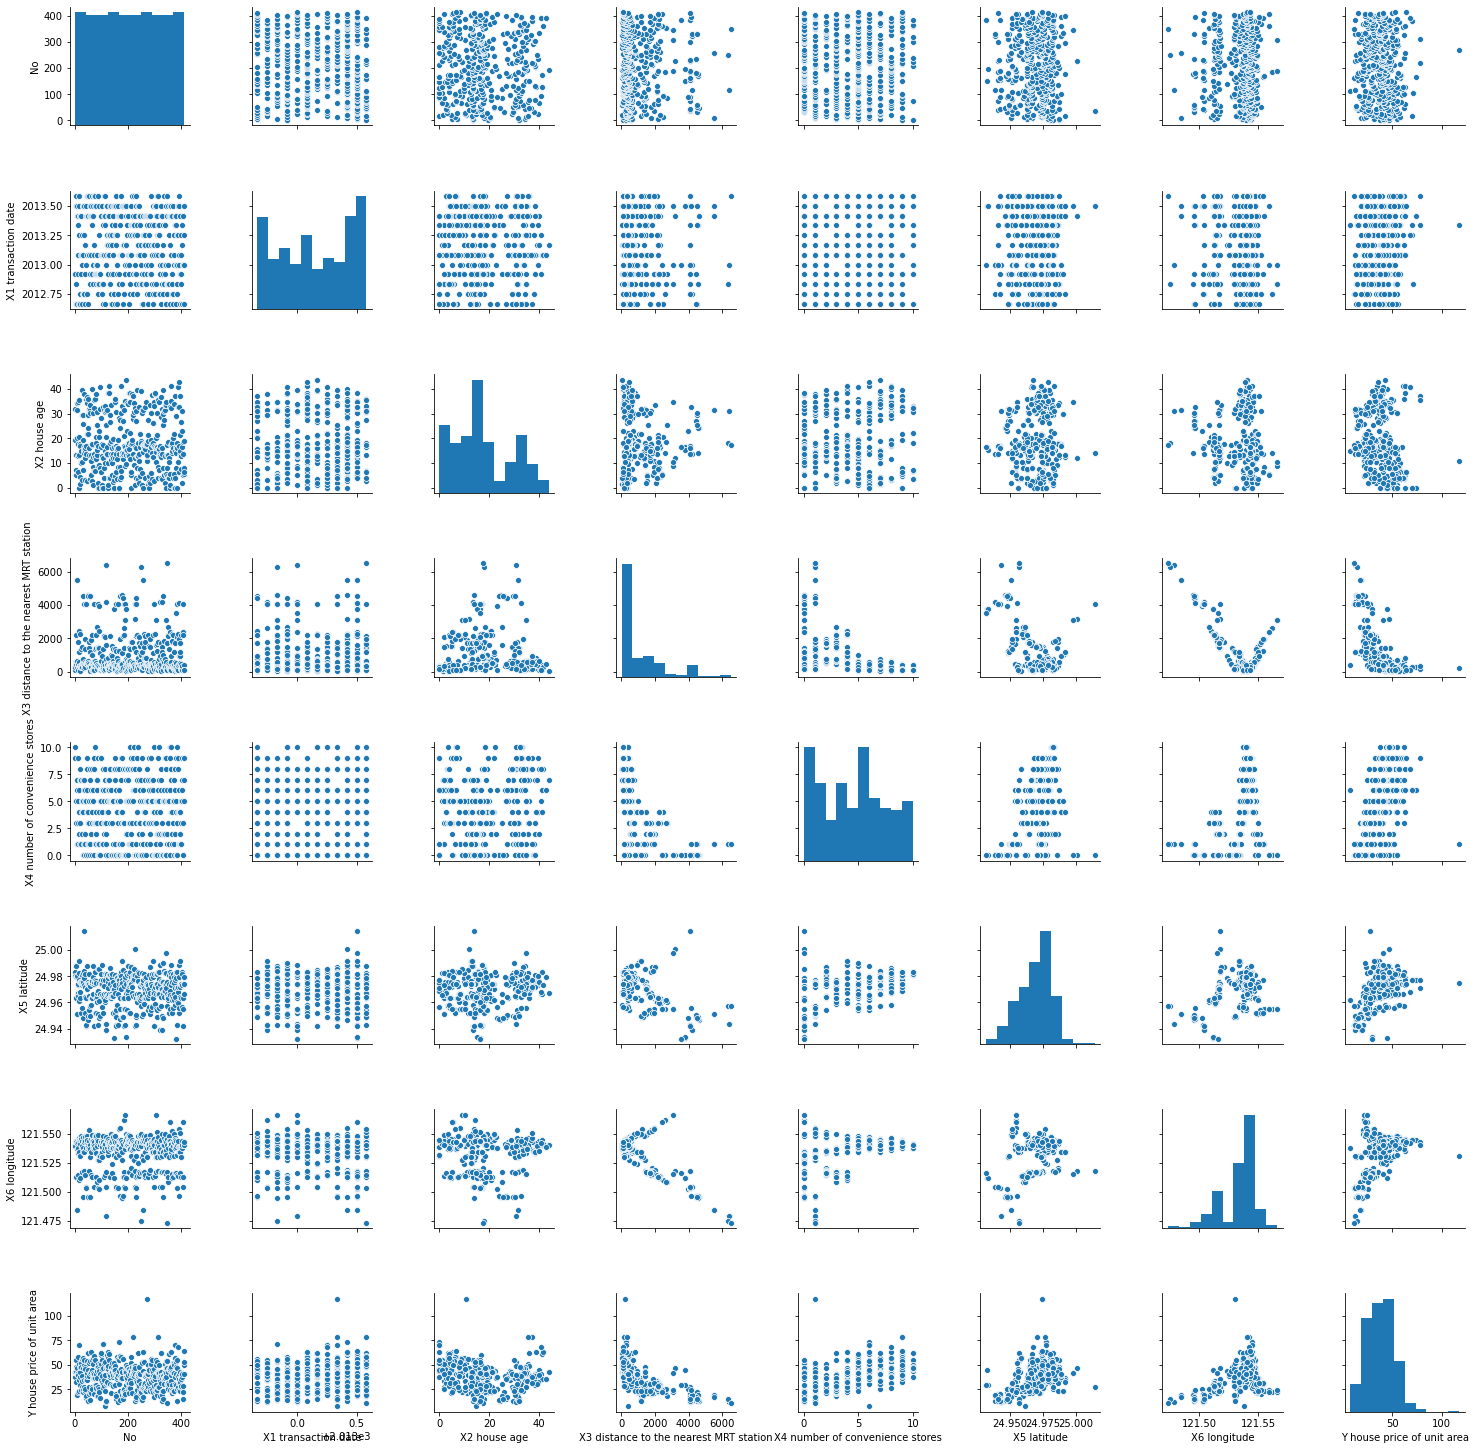

In [244]:
sns.pairplot(newdb)
#this needs to be out as data analysis of the dataset along with a few more graphs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000EF160A28E0>,
      dtype=object)

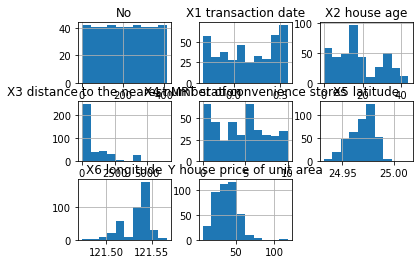

In [246]:
newdb.hist()
#another graph

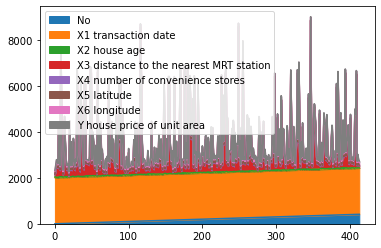

In [249]:
newdb.plot.area()
#another graph

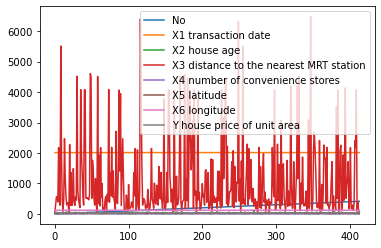

In [250]:
newdb.plot.line()
#graph4

In [252]:
newdb.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [253]:
y=newdb[newdb.columns[-1]] #assigns last columm of the dataset to y variable for prediction

In [254]:
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

In [256]:
x=newdb[newdb.columns[:-1]]
#assigns all columns except the last one to the x variable

In [257]:
x.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245


In [258]:
from sklearn.model_selection import train_test_split

In [259]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

In [260]:
model=LinearRegression()

In [261]:
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [263]:
pred=model.predict(x_test)

In [266]:
pred[:6]
#predictions of top 6 values in table

array([46.81060255, 38.26034487, 17.03635234, 43.67171157, 43.41841705,
       32.86106785])

In [267]:
from sklearn import metrics

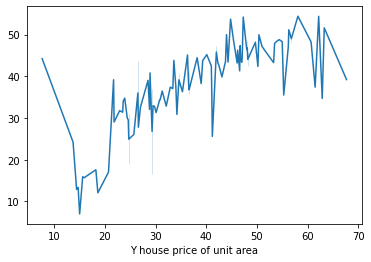

In [268]:
sns.lineplot(y_test,pred)
#to play the relation between the prediction and the actual values

In [269]:
model.score(x,y)*100
#this is the accuracy percentage for this datatset accoring to our model

58.147124882592514

In [270]:
import joblib

In [271]:
joblib.dump(model,'general_model.sav')
#saves in general model file

['general_model.sav']

In [ ]:
#model complete